In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("C:/Users/bielz/OneDrive/Documentos/GitHub/2024/January/covid_19_data.csv")

In [3]:
df.drop(['SNo', 'Last Update'], axis=1, inplace=True)

In [4]:
df.rename(columns={'ObservationDate':'Date', 'Province/State':'State', 'Country/Region':'Country'}, inplace=True)

In [5]:
df['Date']

0       01/22/2020
1       01/22/2020
2       01/22/2020
3       01/22/2020
4       01/22/2020
           ...    
4242    03/08/2020
4243    03/08/2020
4244    03/08/2020
4245    03/08/2020
4246    03/08/2020
Name: Date, Length: 4247, dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date']


0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
          ...    
4242   2020-03-08
4243   2020-03-08
4244   2020-03-08
4245   2020-03-08
4246   2020-03-08
Name: Date, Length: 4247, dtype: datetime64[ns]

In [8]:
imputer = SimpleImputer(strategy='constant')

In [9]:
imputer

SimpleImputer(strategy='constant')

In [13]:
df2 = df.groupby('Country', as_index=False)[['Confirmed', 'Deaths', 'Recovered']].sum()

In [14]:
df2

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,Afghanistan,17.0,0.0,0.0
2,Algeria,91.0,0.0,0.0
3,Andorra,7.0,0.0,0.0
4,Argentina,25.0,1.0,0.0
...,...,...,...,...
106,US,2660.0,90.0,150.0
107,Ukraine,6.0,0.0,0.0
108,United Arab Emirates,524.0,0.0,108.0
109,Vatican City,3.0,0.0,0.0


In [12]:
df

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
4242,2020-03-08,Northern Territory,Australia,0.0,0.0,0.0
4243,2020-03-08,"Lackland, TX (From Diamond Princess)",US,0.0,0.0,0.0
4244,2020-03-08,"Montgomery County, TX",US,0.0,0.0,0.0
4245,2020-03-08,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0


In [16]:
df3 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

KeyError: 'Date'

In [17]:
df2

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,Afghanistan,17.0,0.0,0.0
2,Algeria,91.0,0.0,0.0
3,Andorra,7.0,0.0,0.0
4,Argentina,25.0,1.0,0.0
...,...,...,...,...
106,US,2660.0,90.0,150.0
107,Ukraine,6.0,0.0,0.0
108,United Arab Emirates,524.0,0.0,108.0
109,Vatican City,3.0,0.0,0.0


In [18]:
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [19]:
df3 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

TypeError: datetime64 type does not support sum operations

In [20]:
df2

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
4242,2020-03-08,Northern Territory,Australia,0.0,0.0,0.0
4243,2020-03-08,"Lackland, TX (From Diamond Princess)",US,0.0,0.0,0.0
4244,2020-03-08,"Montgomery County, TX",US,0.0,0.0,0.0
4245,2020-03-08,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0


In [21]:
df2['Date']

0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
          ...    
4242   2020-03-08
4243   2020-03-08
4244   2020-03-08
4245   2020-03-08
4246   2020-03-08
Name: Date, Length: 4247, dtype: datetime64[ns]

In [24]:
df3 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

TypeError: datetime64 type does not support sum operations

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df3 = df.groupby(['Country', 'Date'], as_index=False)[['Confirmed', 'Deaths', 'Recovered']].sum()

In [26]:
df3

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0
...,...,...,...,...,...
1856,Vietnam,2020-03-04,16.0,0.0,16.0
1857,Vietnam,2020-03-05,16.0,0.0,16.0
1858,Vietnam,2020-03-06,16.0,0.0,16.0
1859,Vietnam,2020-03-07,18.0,0.0,16.0


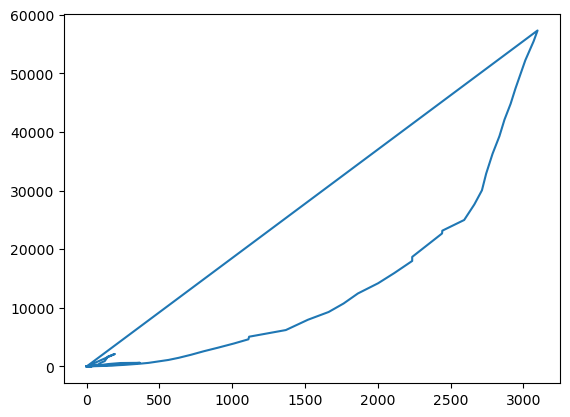

In [34]:
plt.plot(df3['Deaths'],df3['Recovered'])

In [35]:
df3.head(30)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0
5,Afghanistan,2020-02-28,1.0,0.0,0.0
6,Afghanistan,2020-02-29,1.0,0.0,0.0
7,Afghanistan,2020-03-01,1.0,0.0,0.0
8,Afghanistan,2020-03-02,1.0,0.0,0.0
9,Afghanistan,2020-03-03,1.0,0.0,0.0


In [37]:
countries = df3['Country'].unique()
%timeit len(countries)

22.9 ns ± 0.107 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


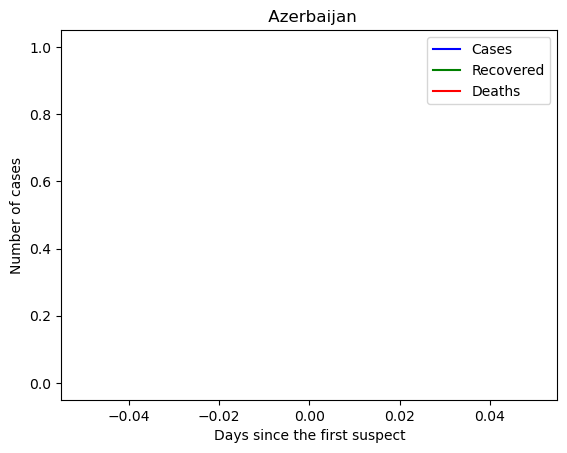

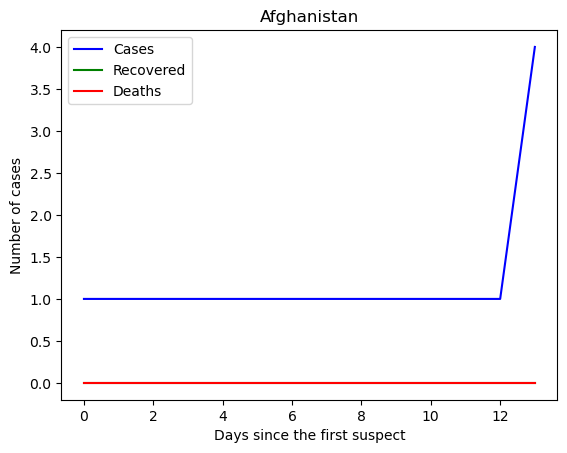

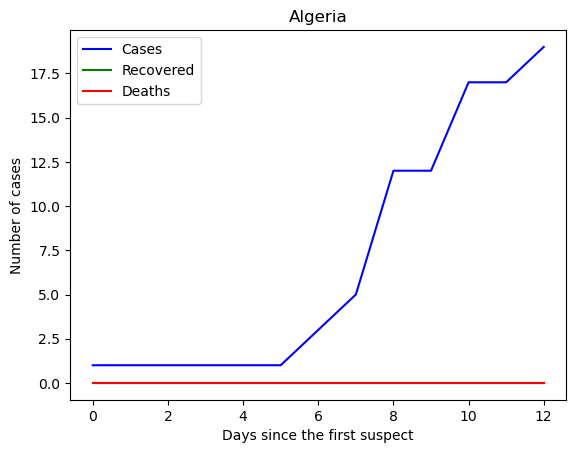

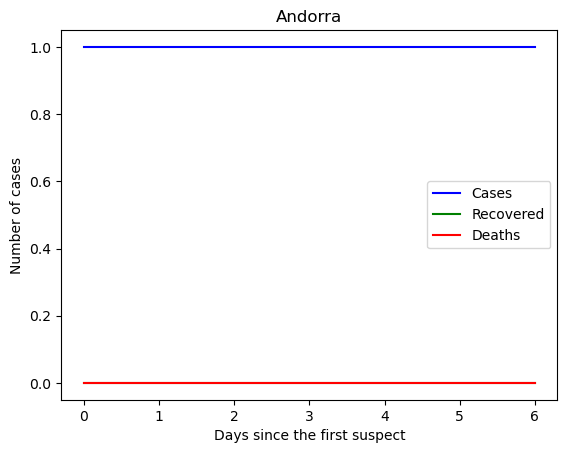

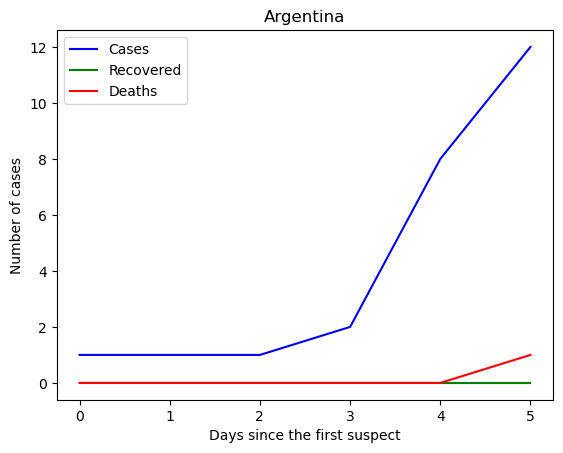

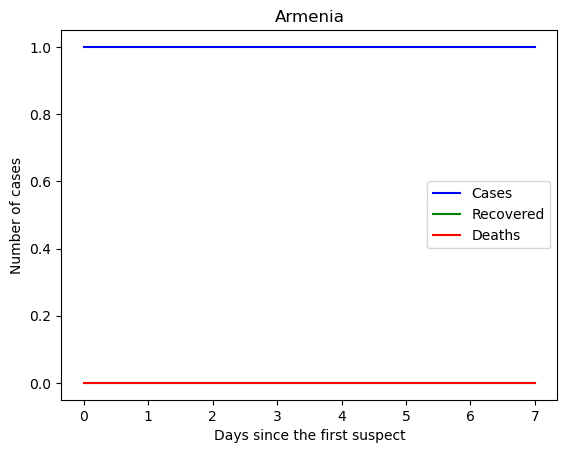

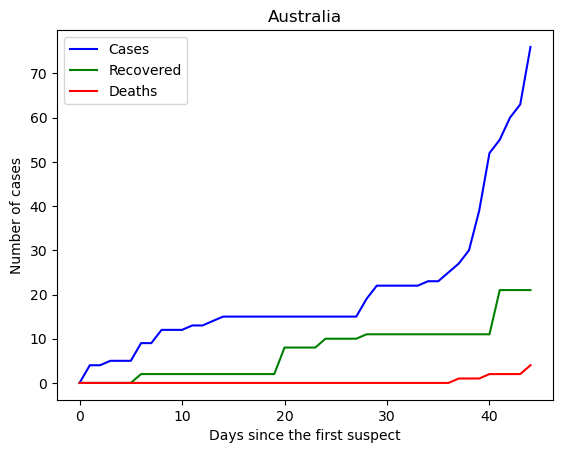

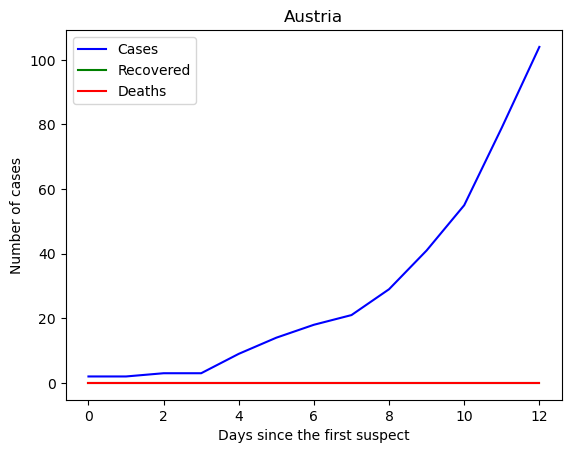

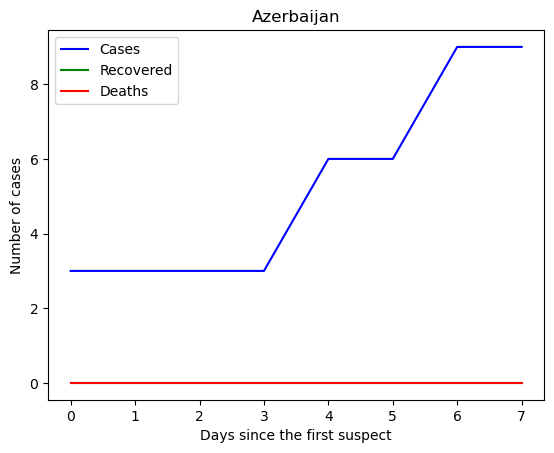

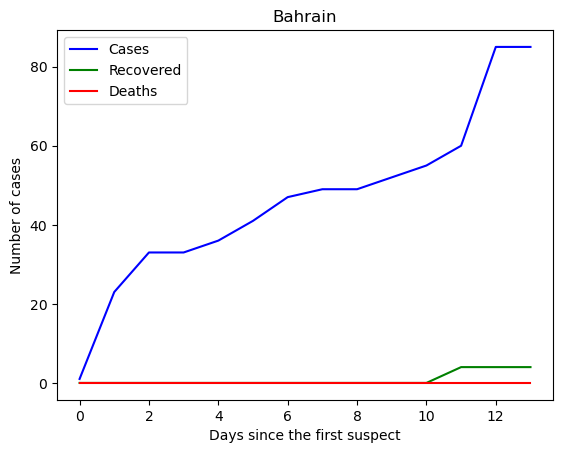

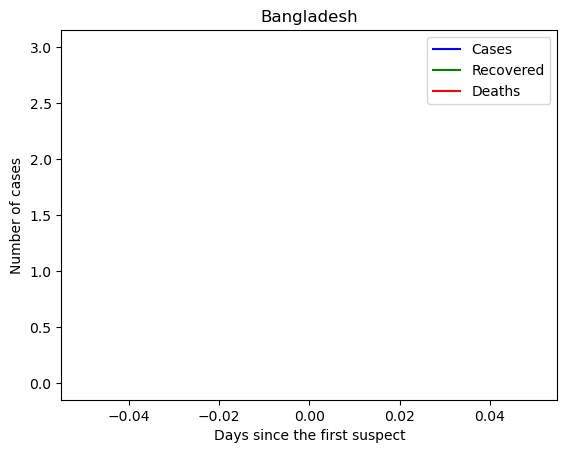

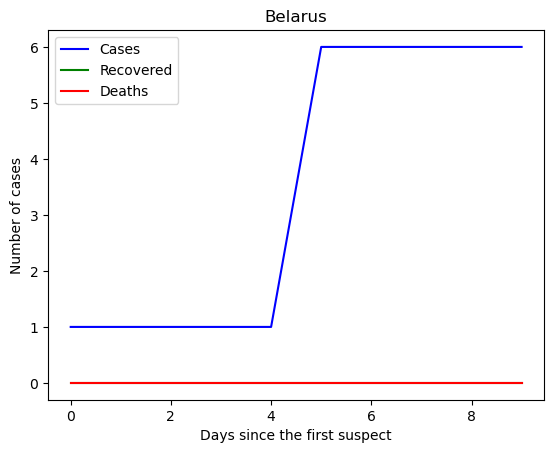

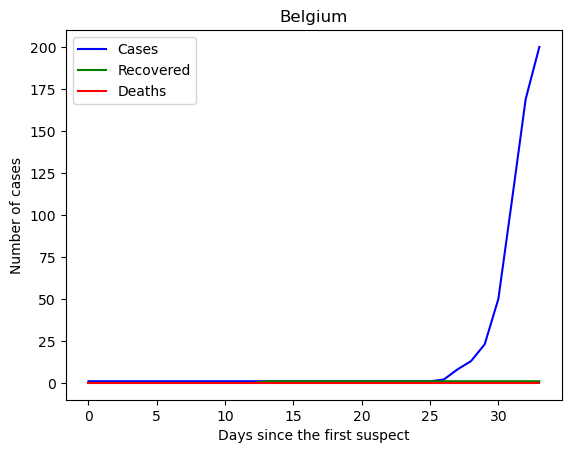

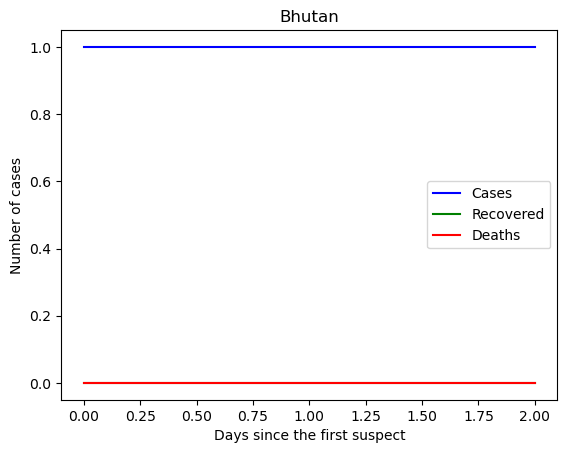

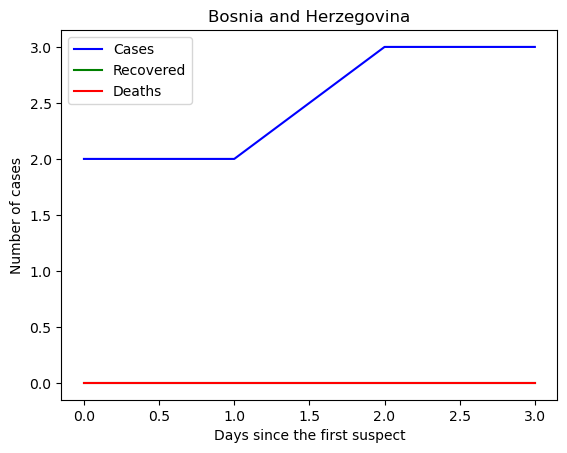

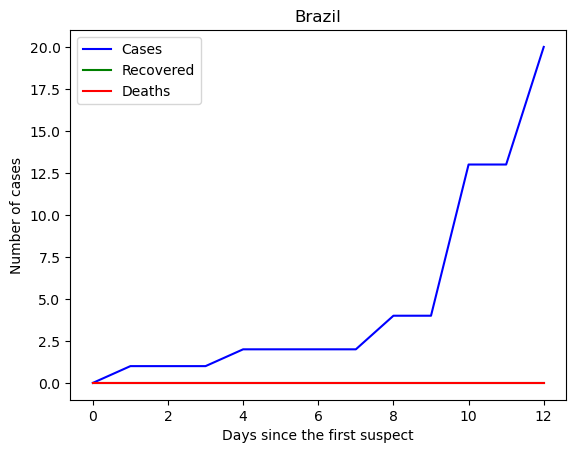

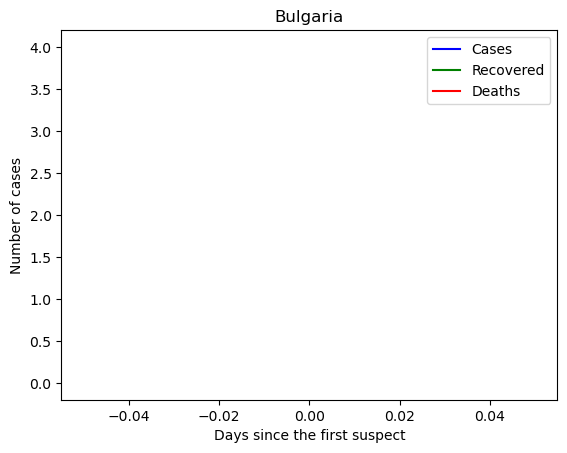

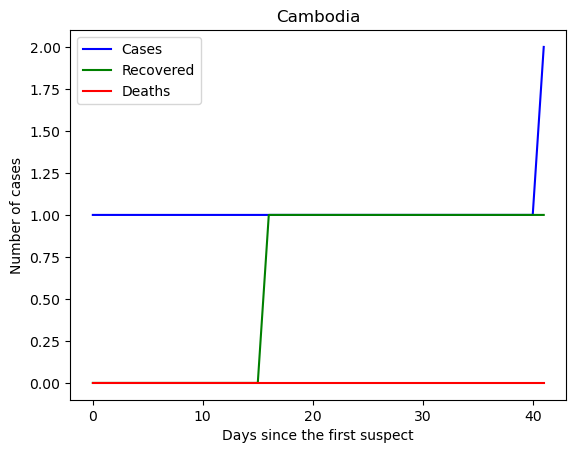

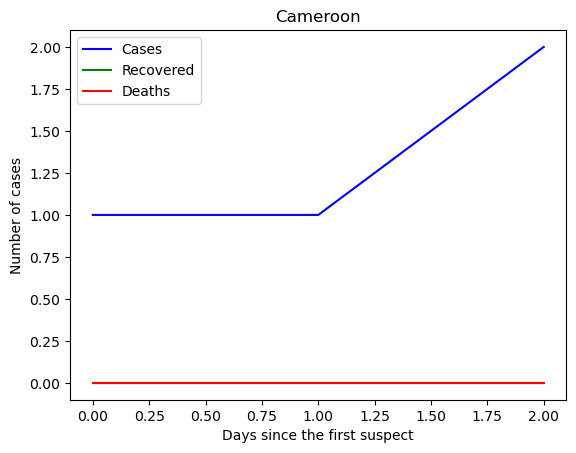

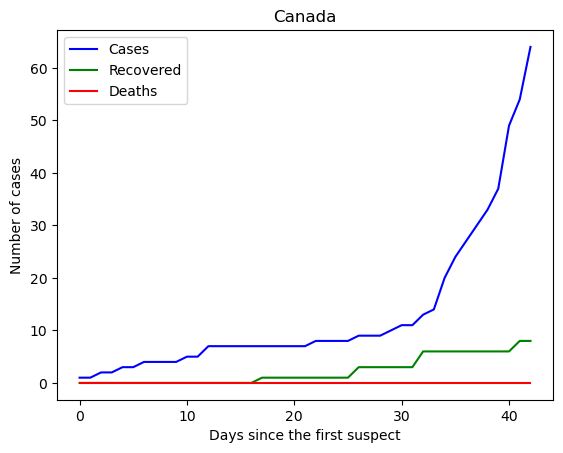

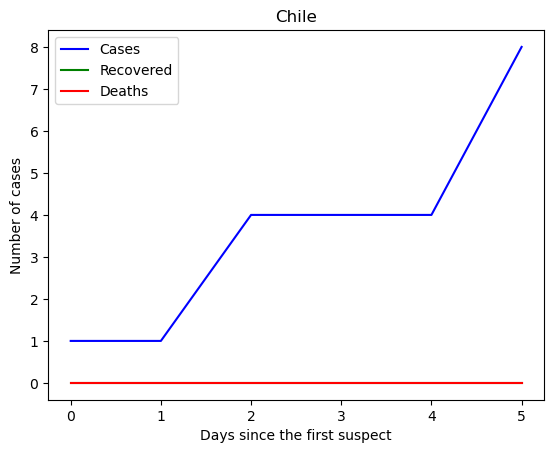

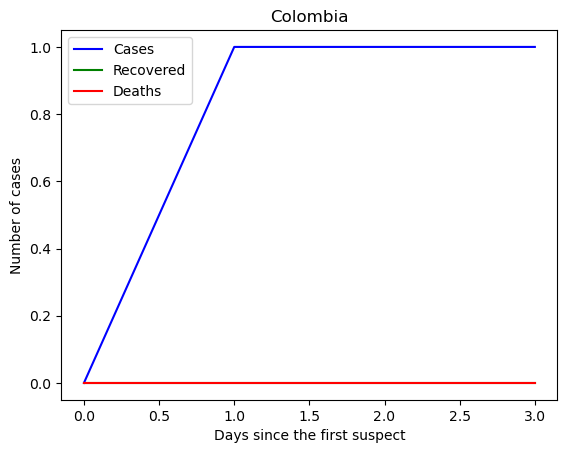

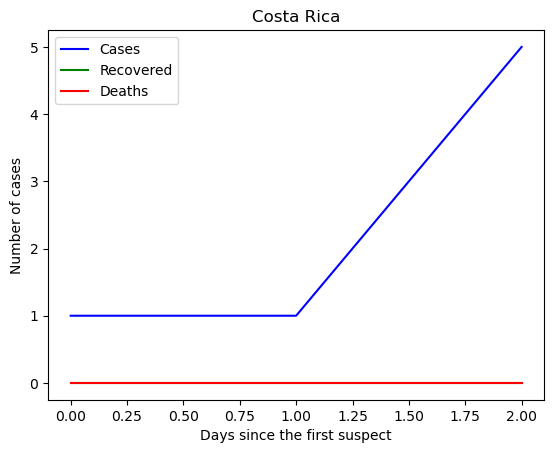

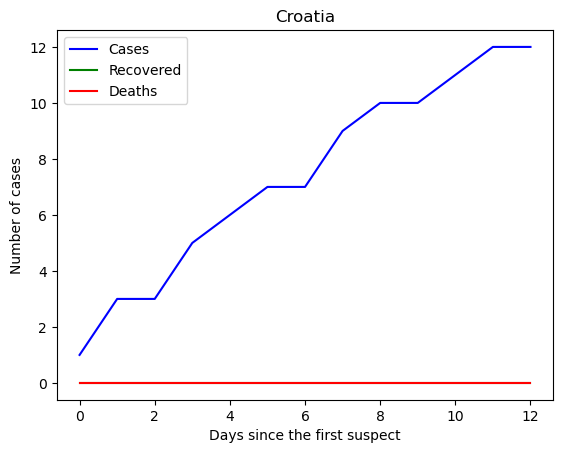

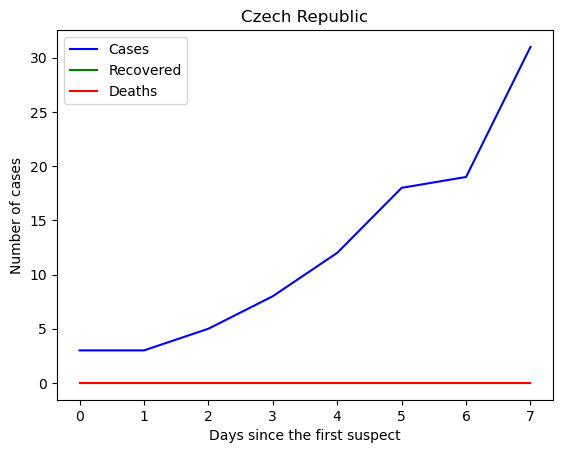

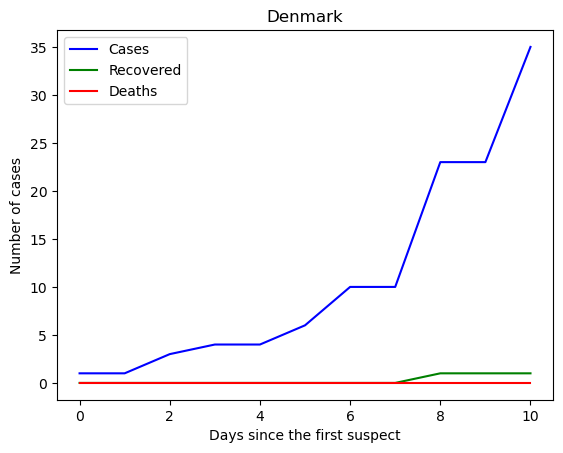

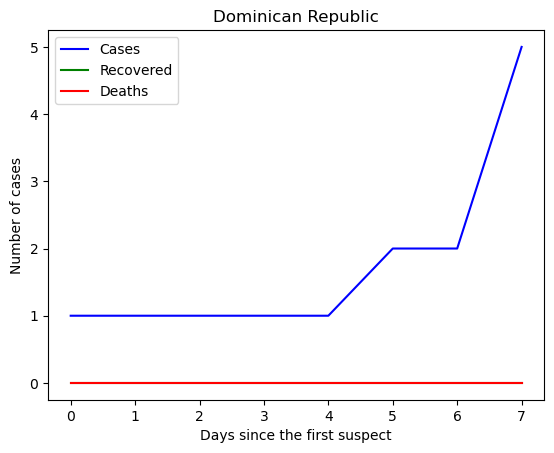

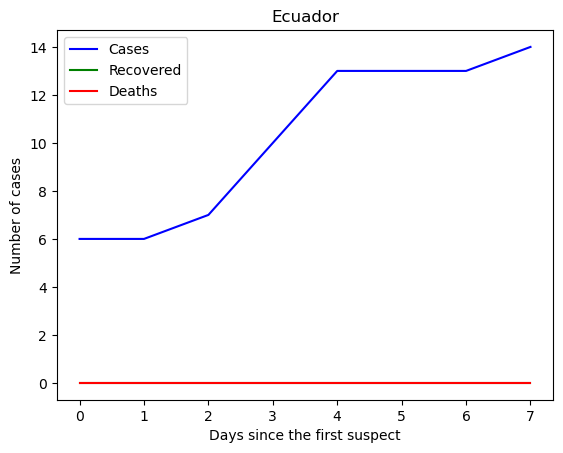

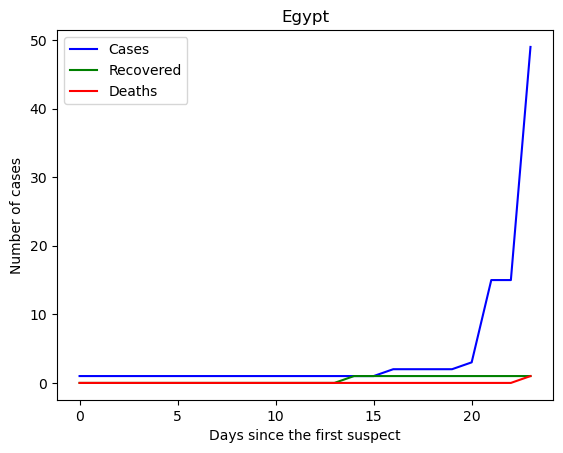

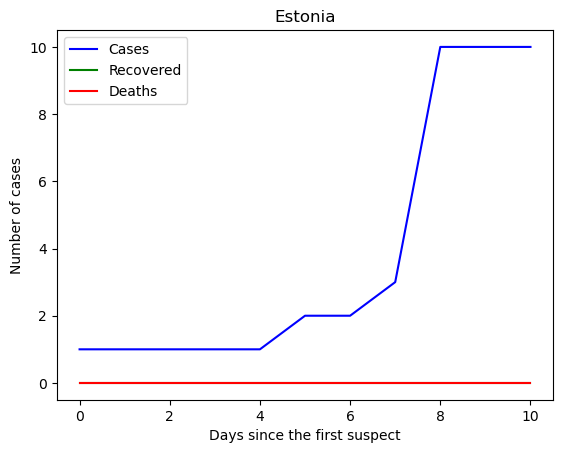

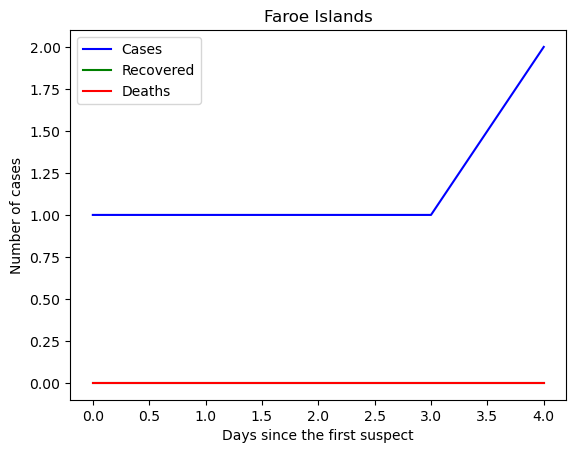

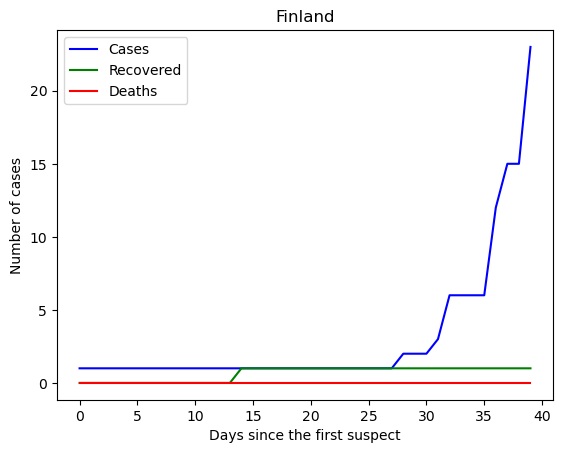

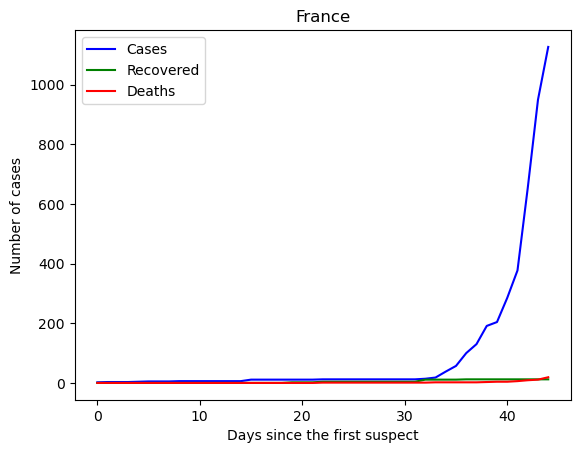

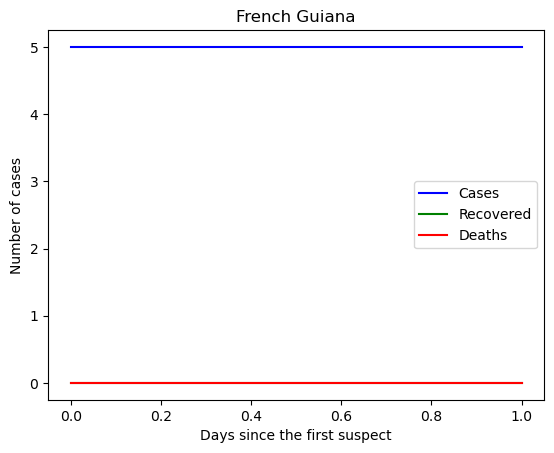

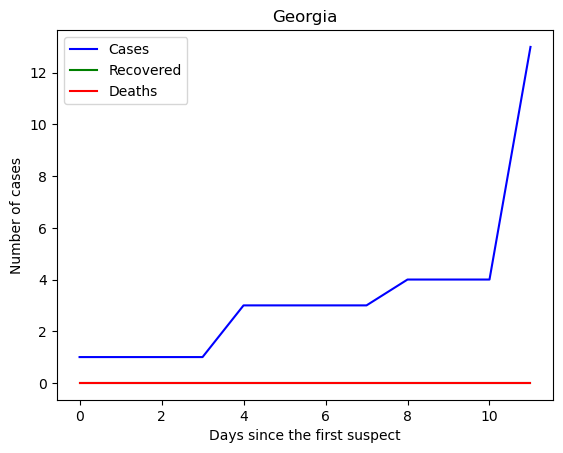

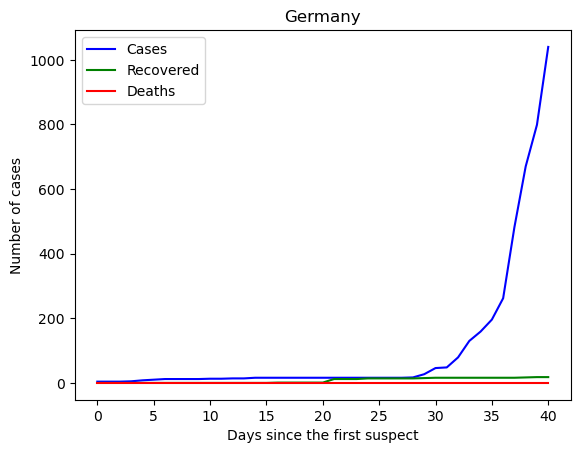

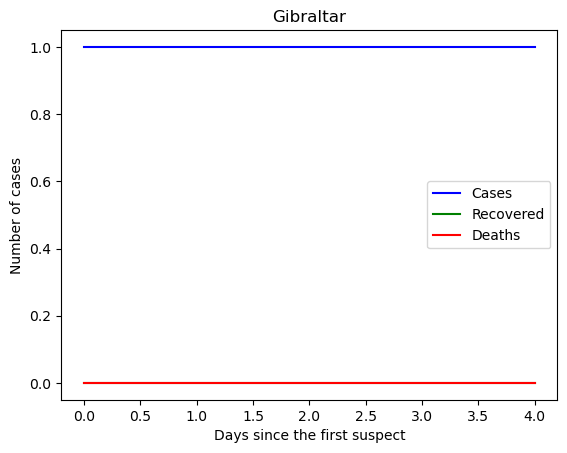

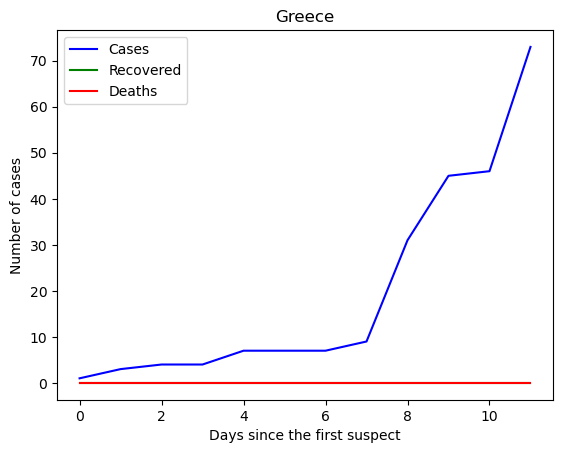

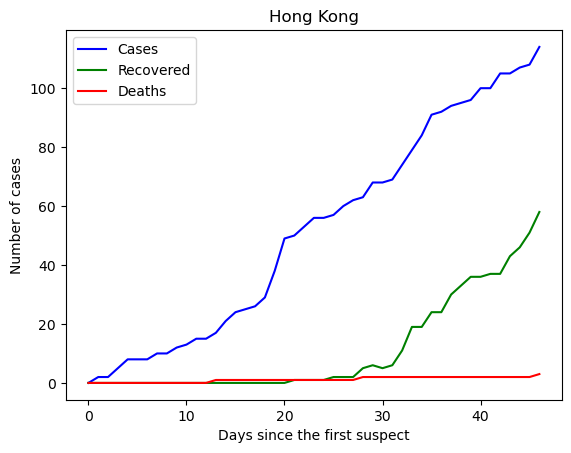

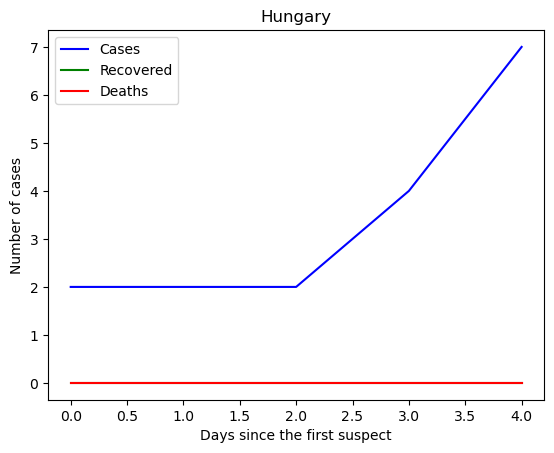

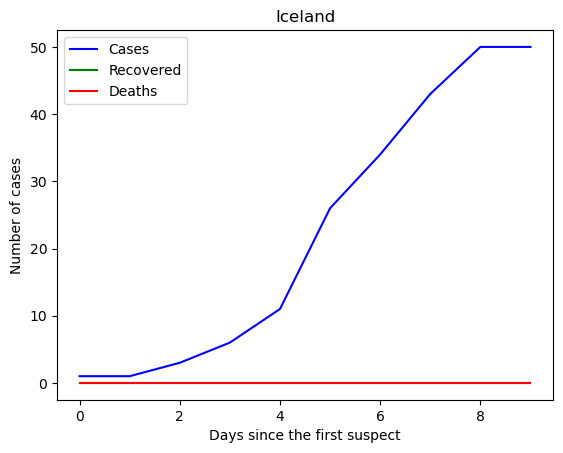

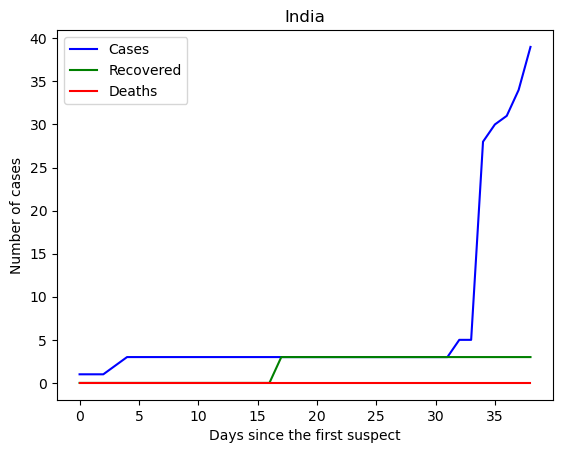

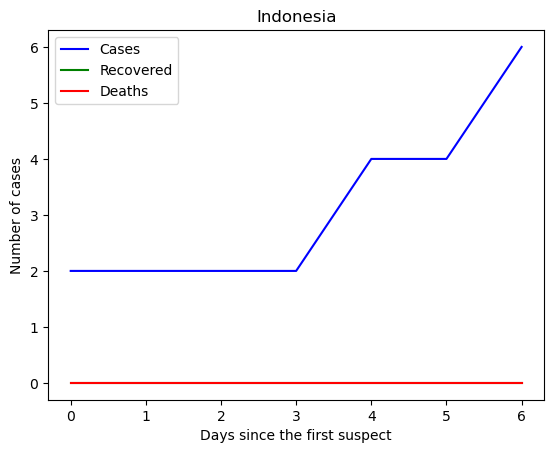

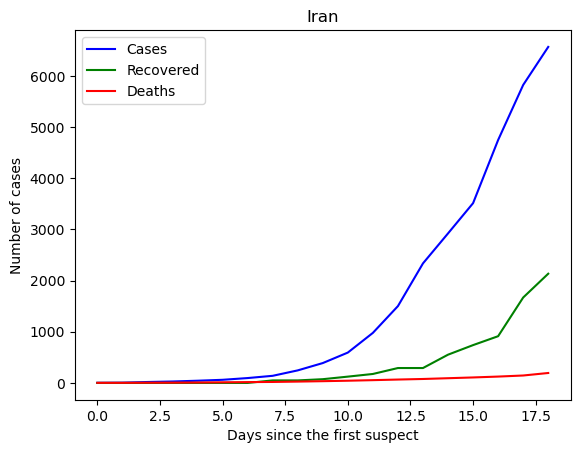

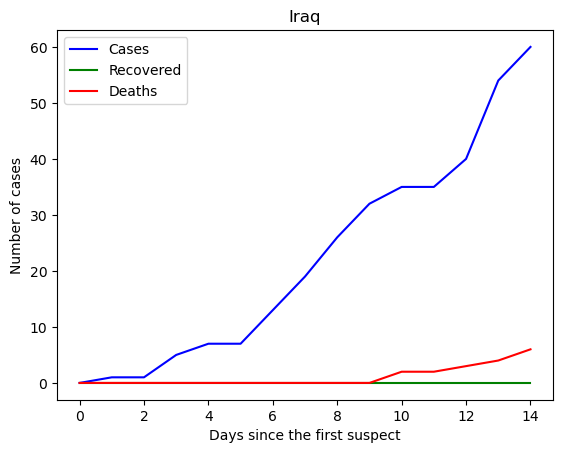

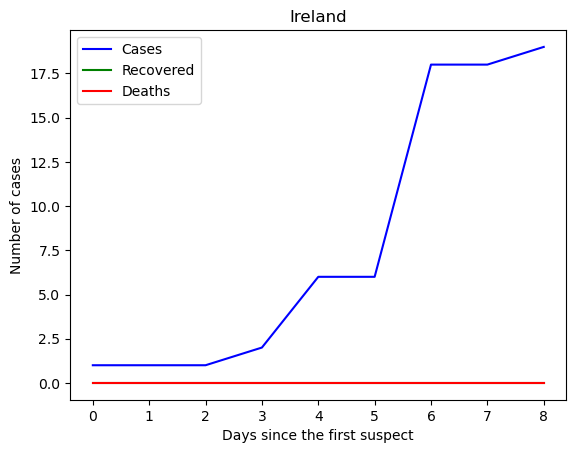

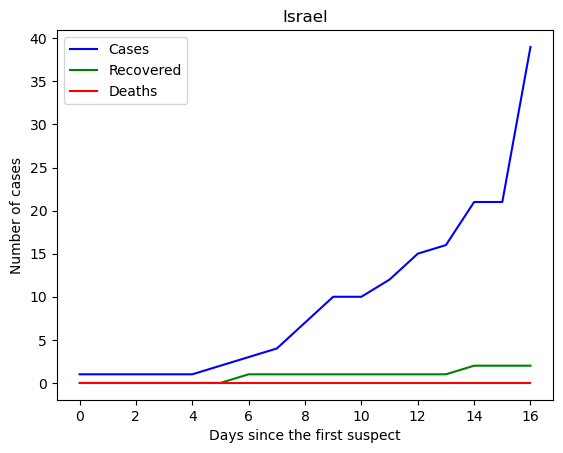

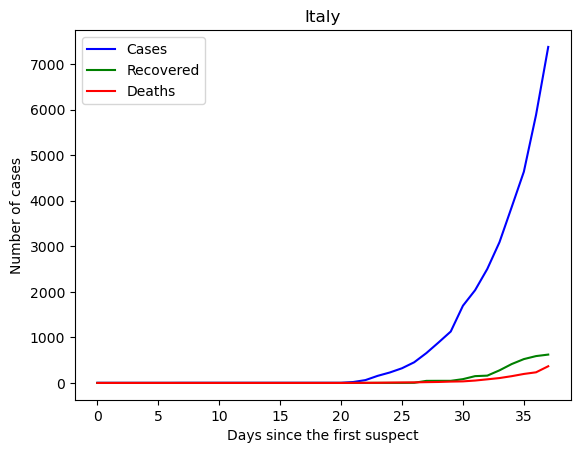

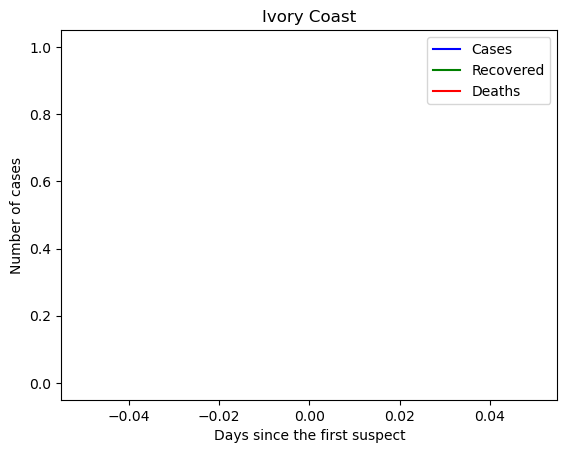

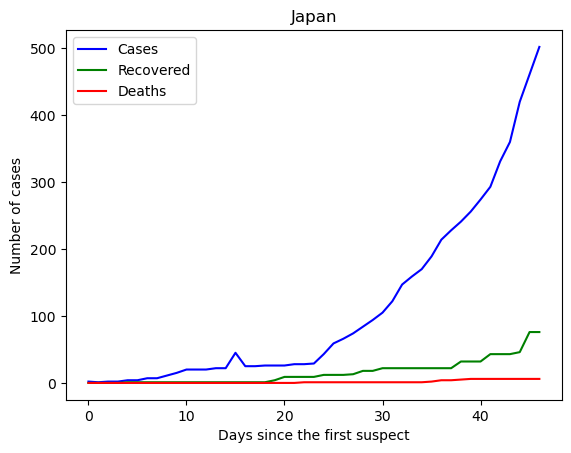

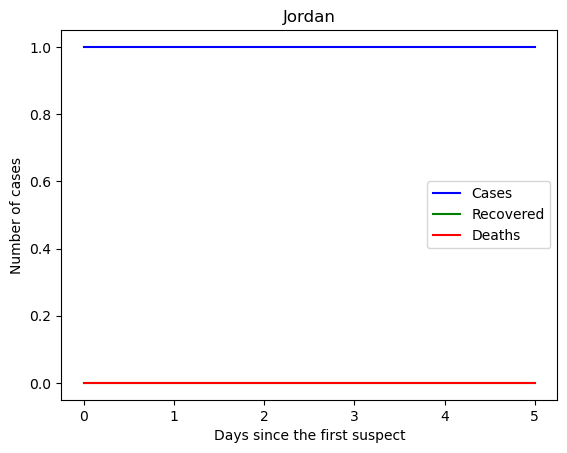

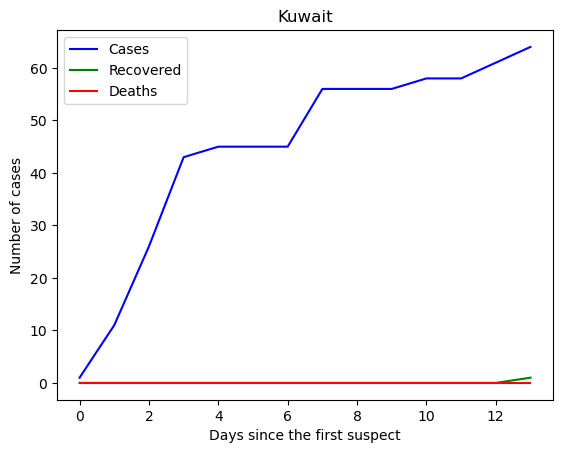

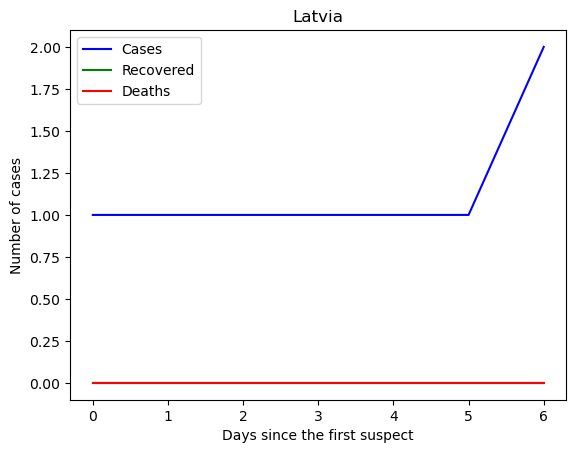

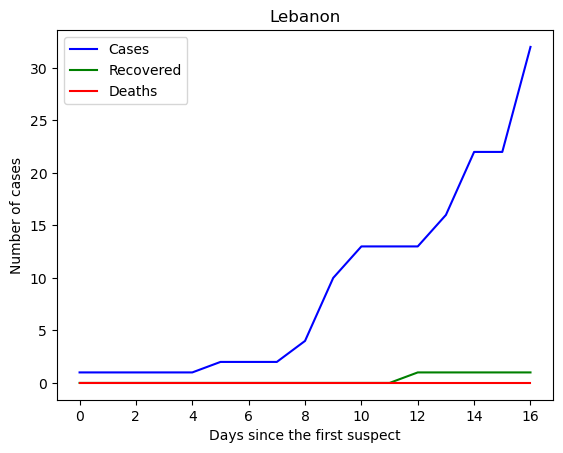

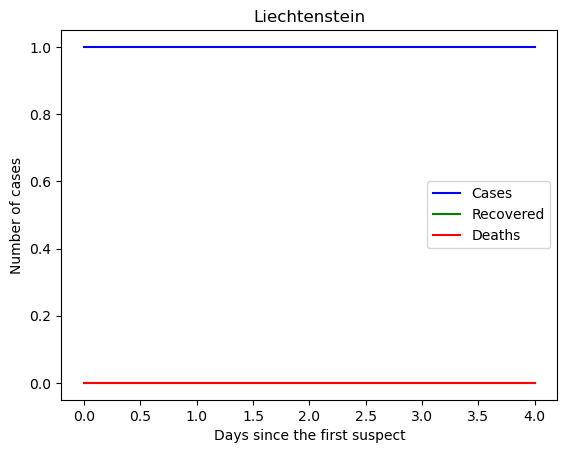

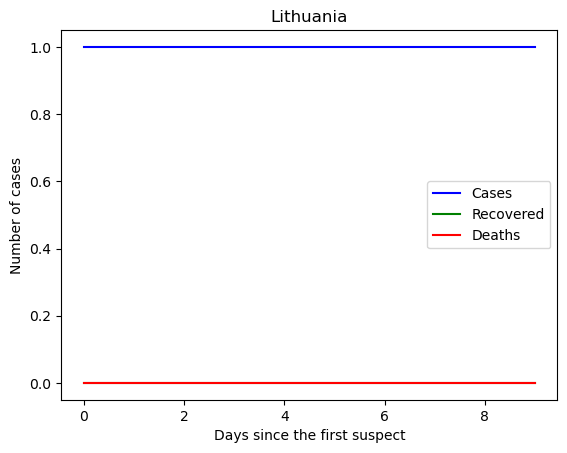

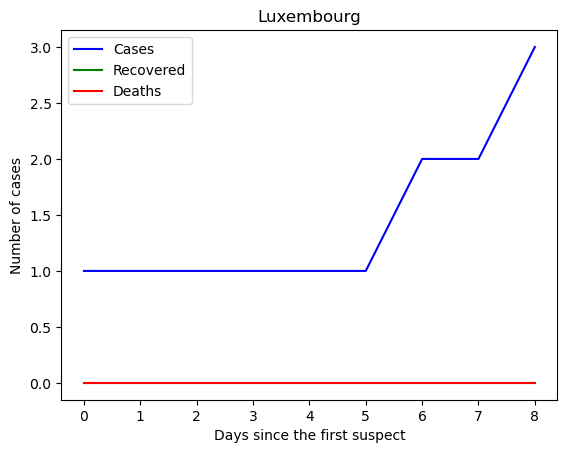

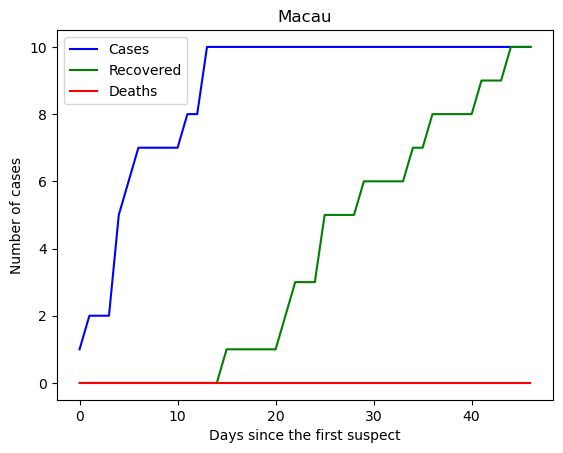

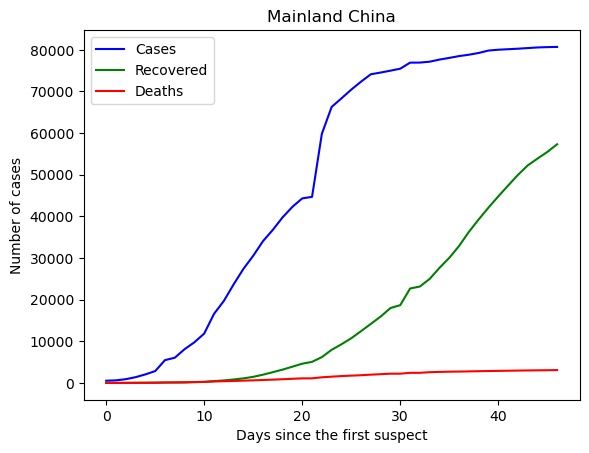

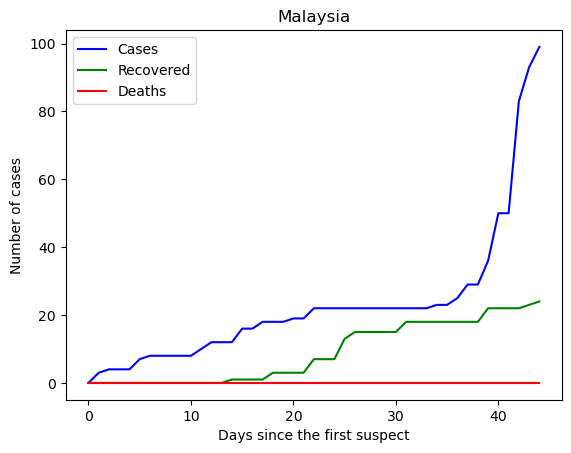

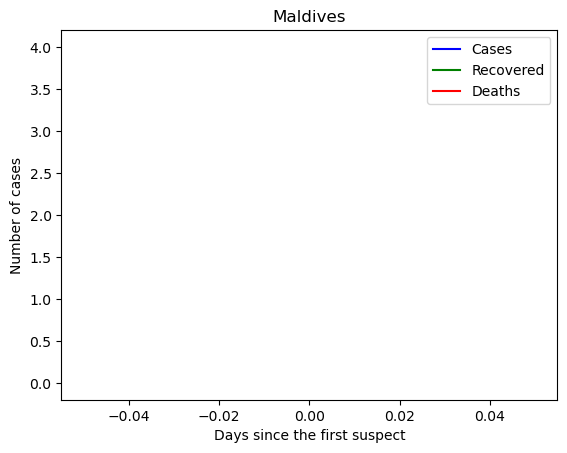

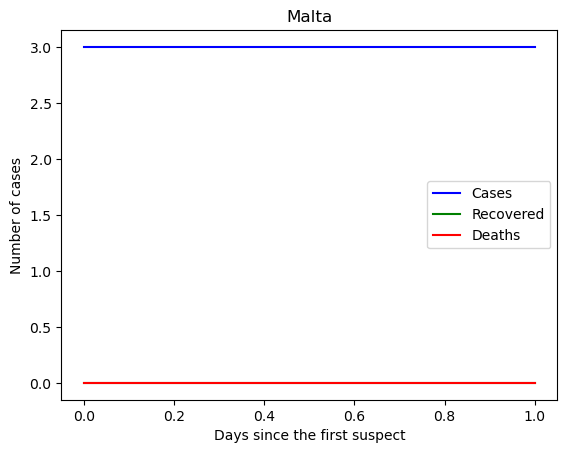

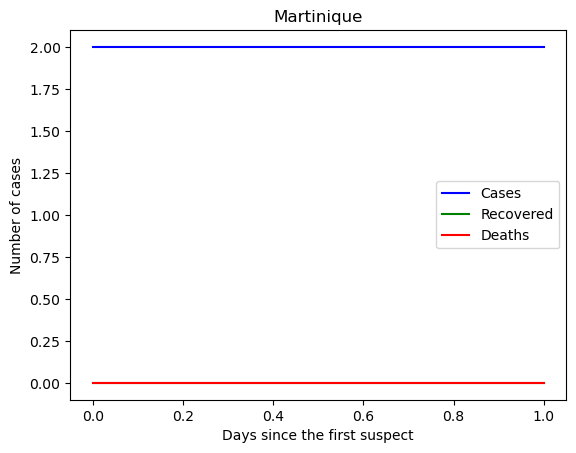

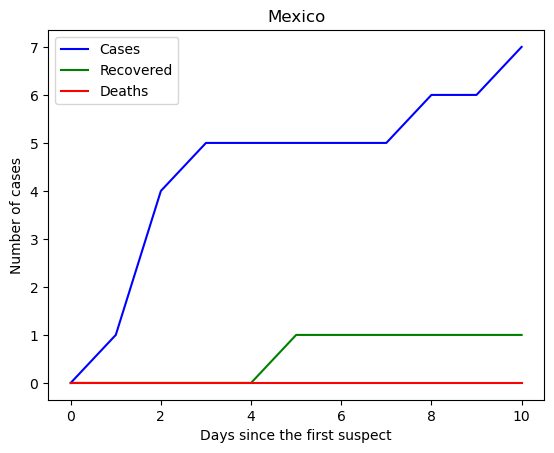

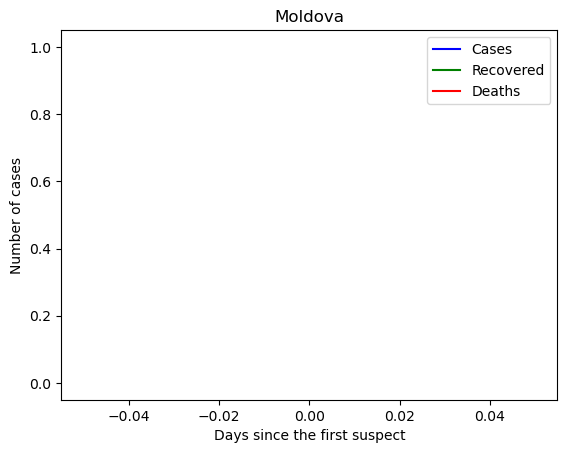

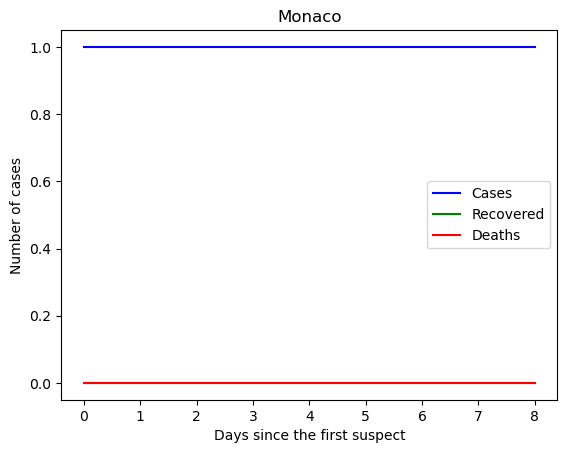

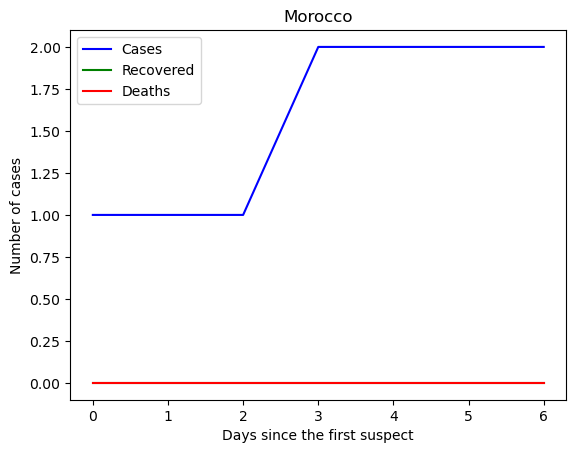

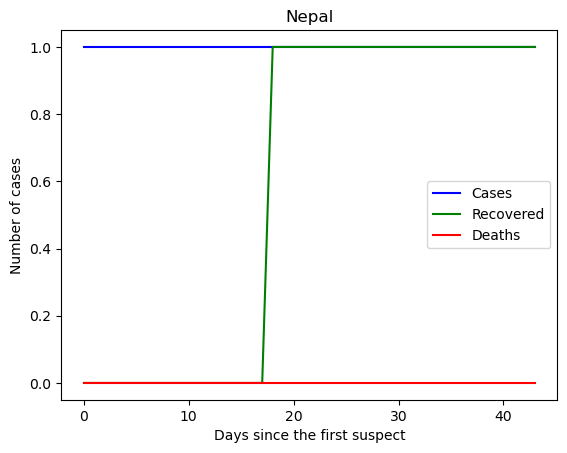

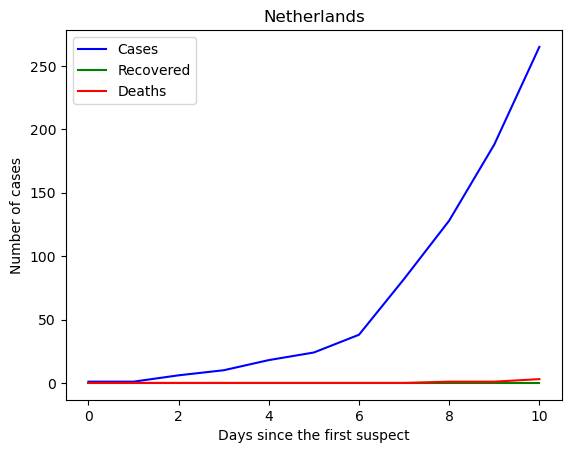

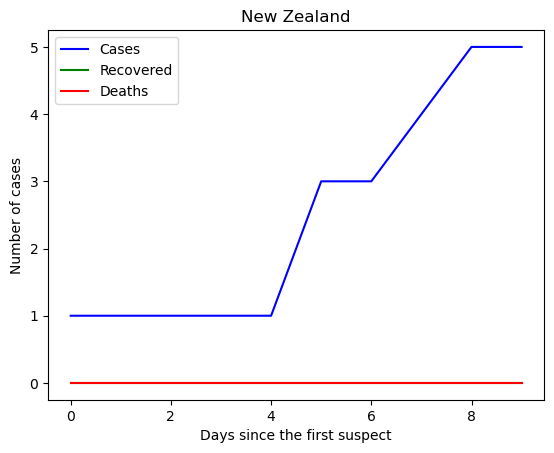

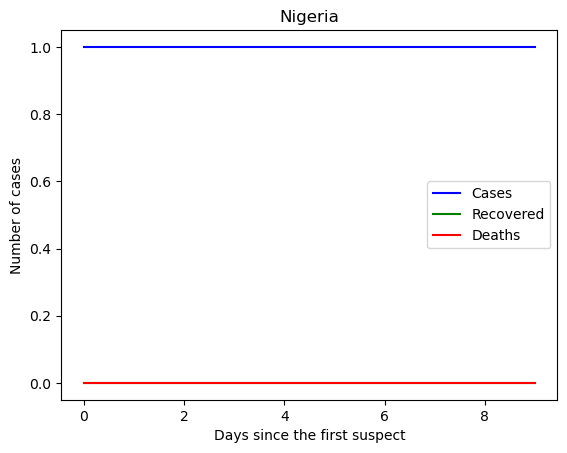

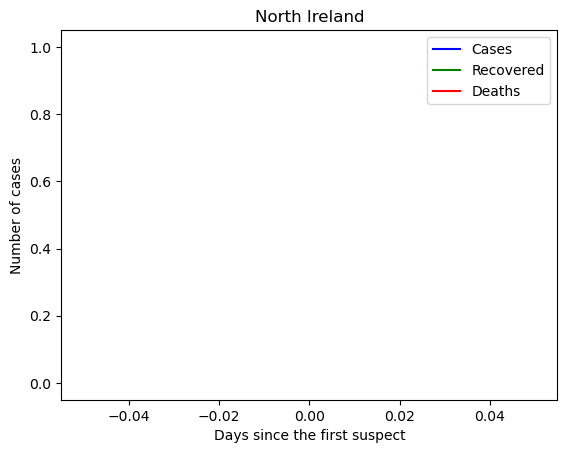

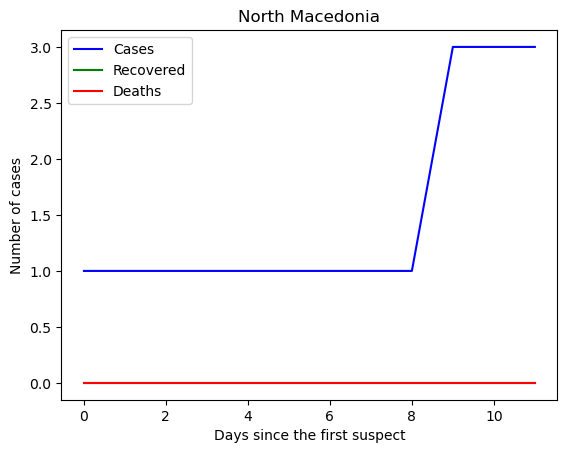

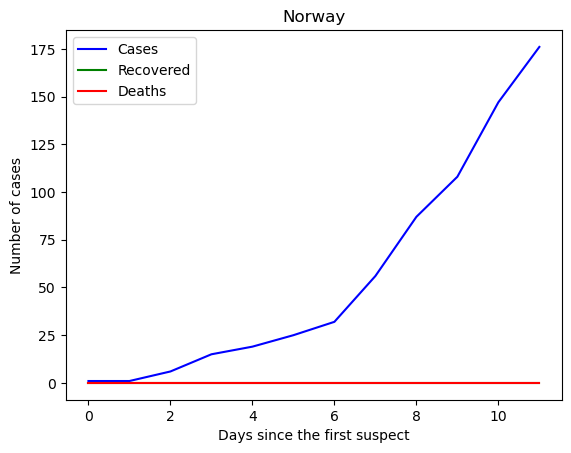

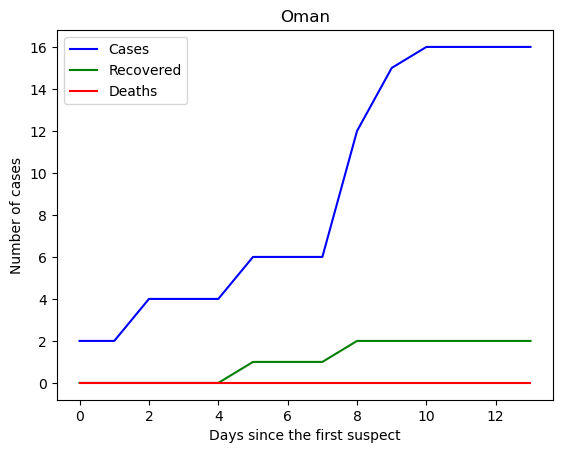

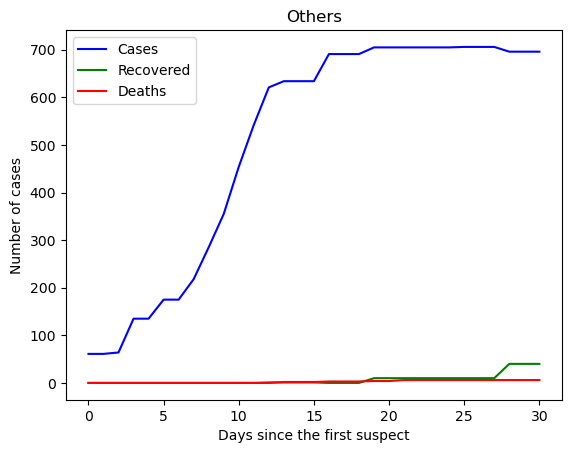

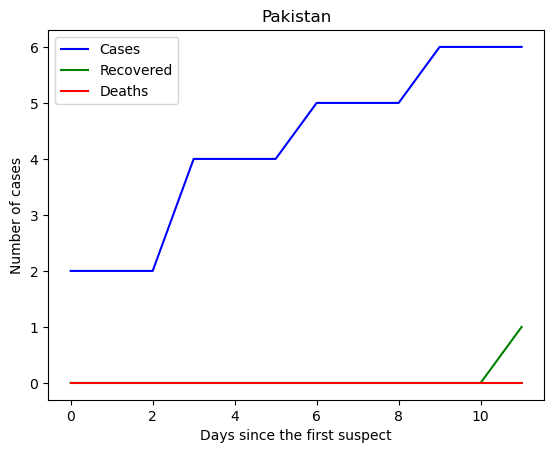

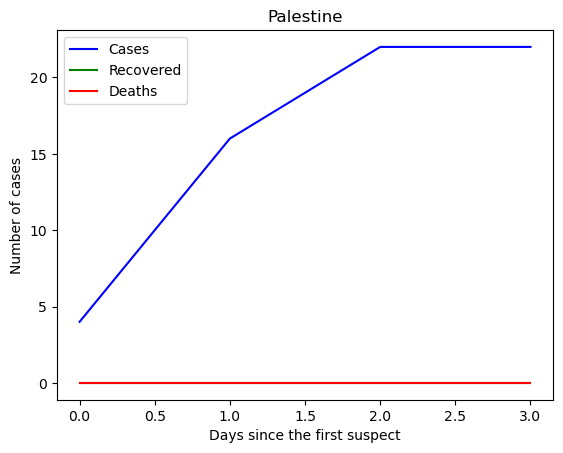

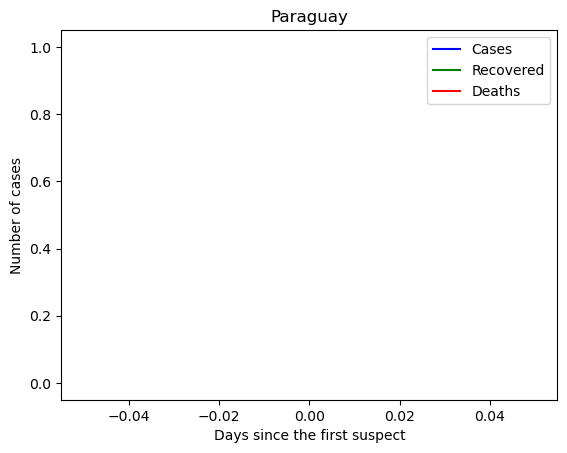

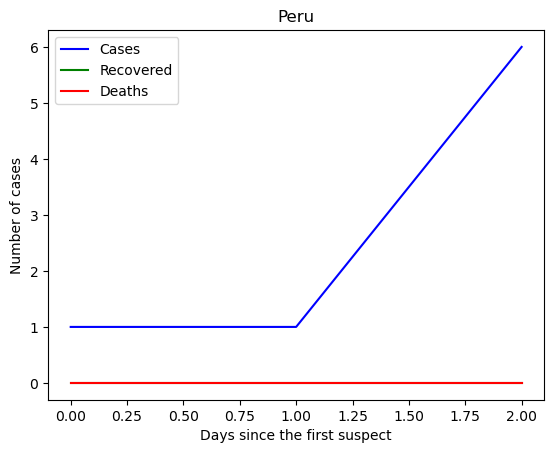

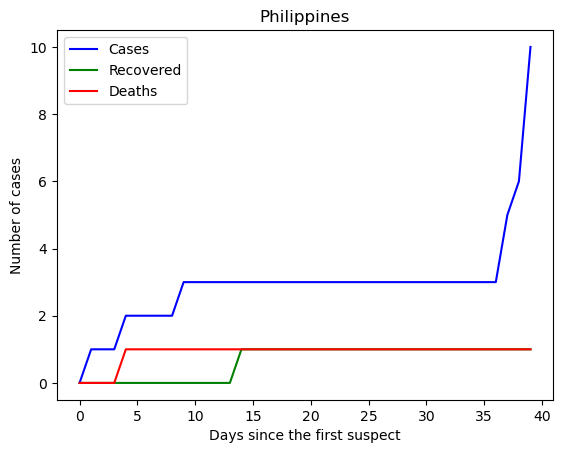

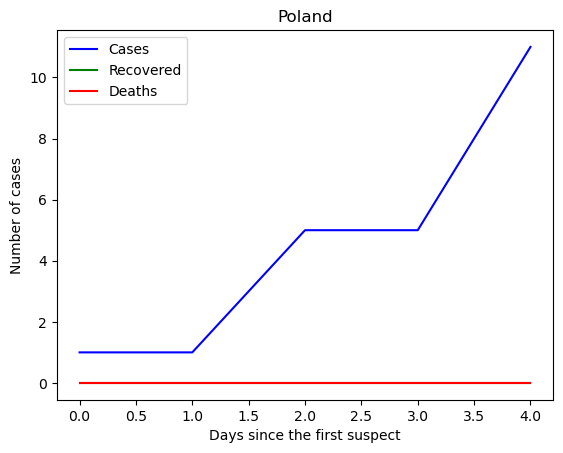

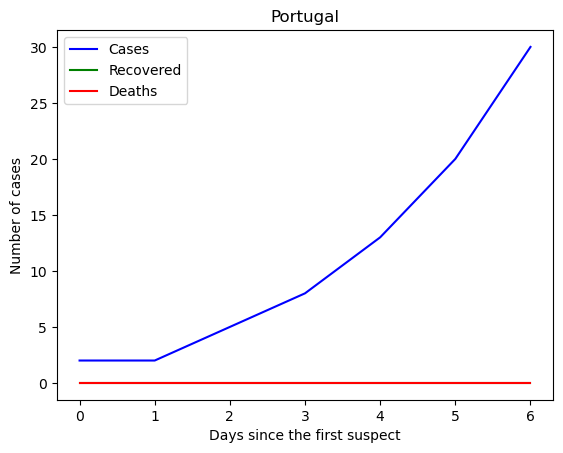

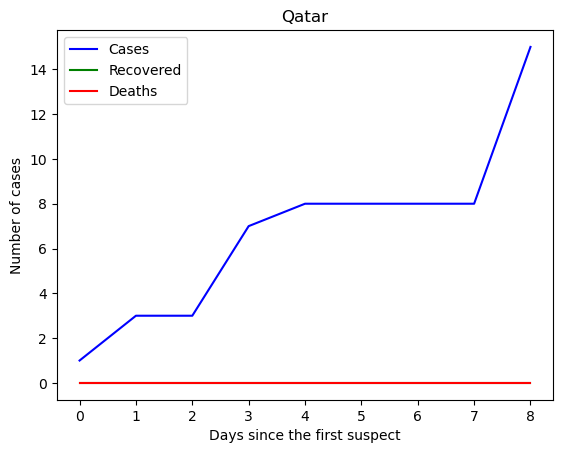

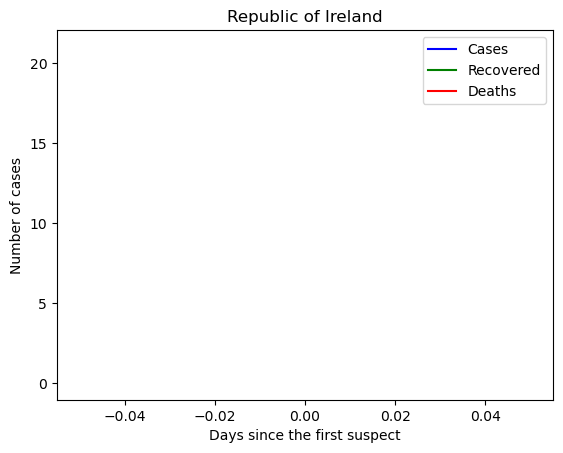

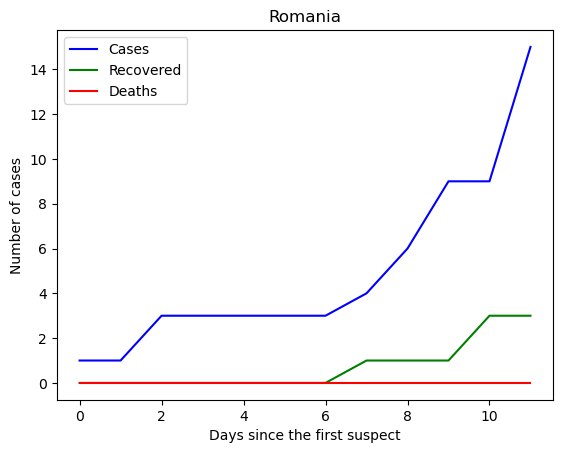

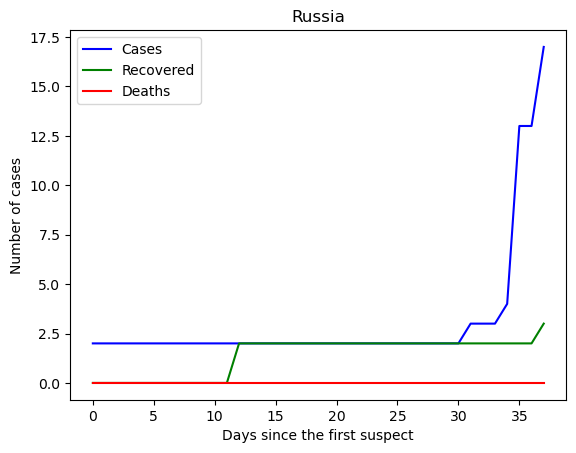

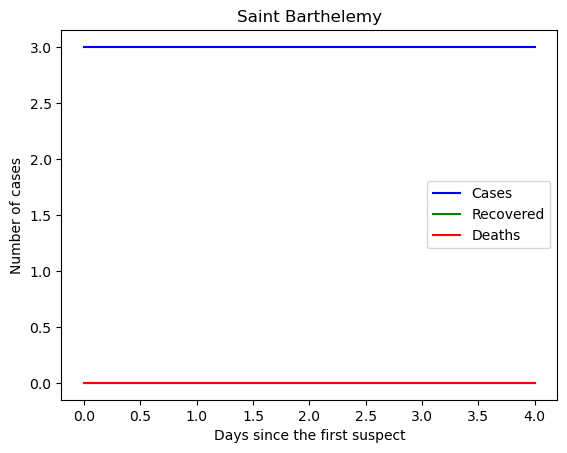

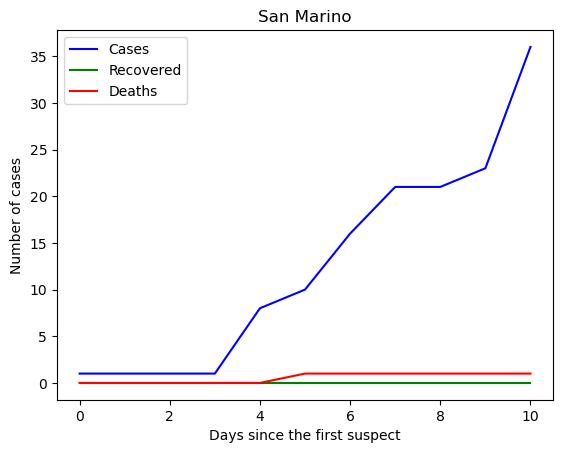

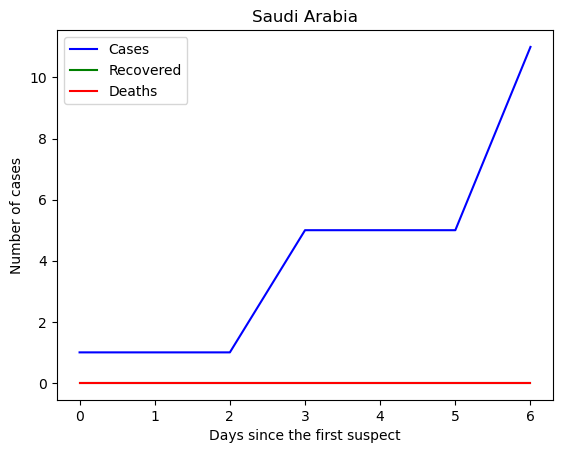

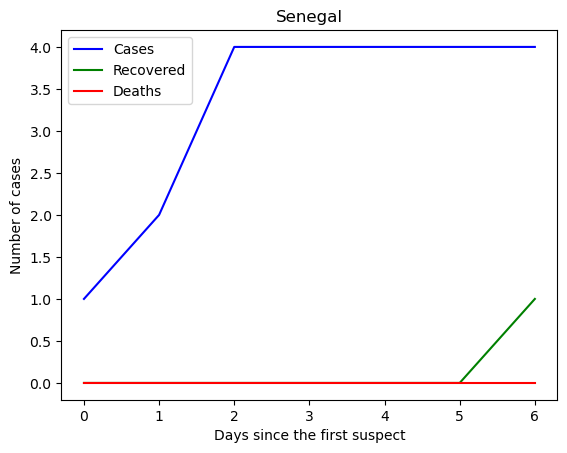

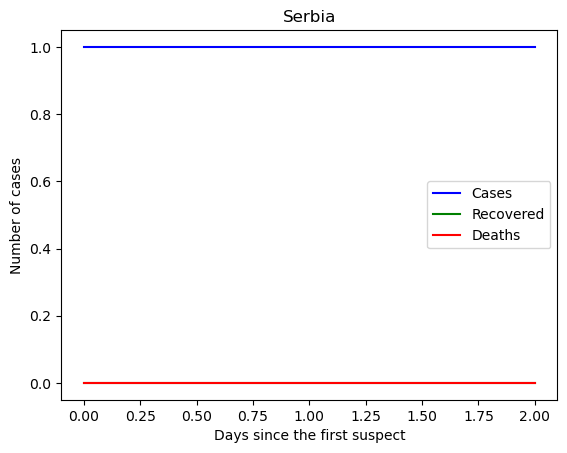

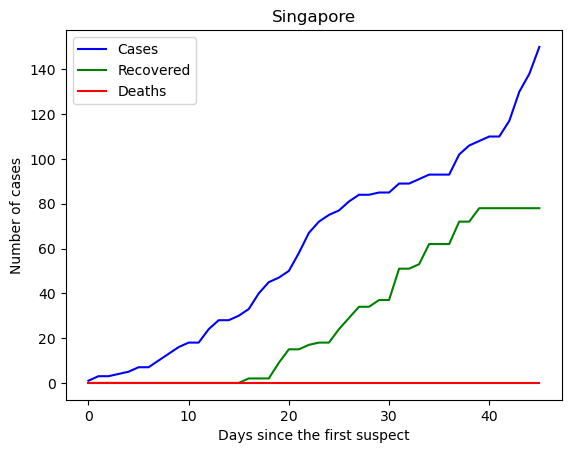

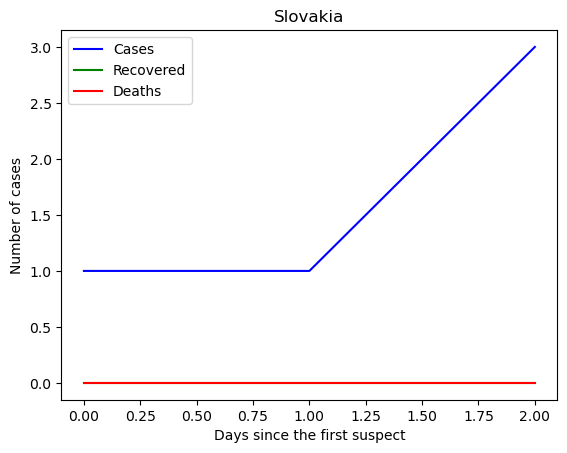

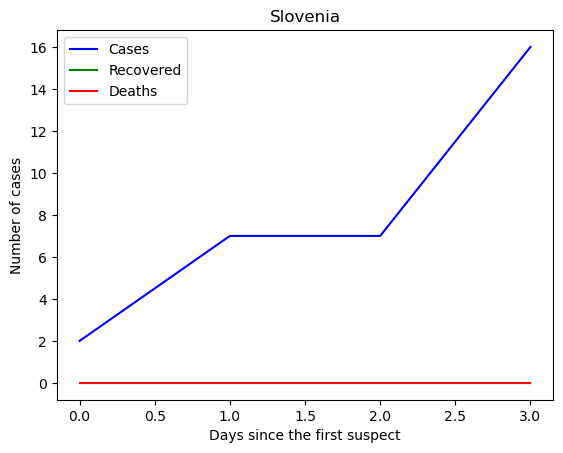

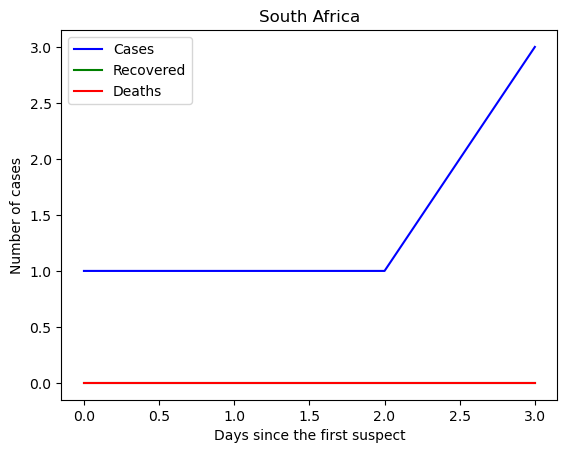

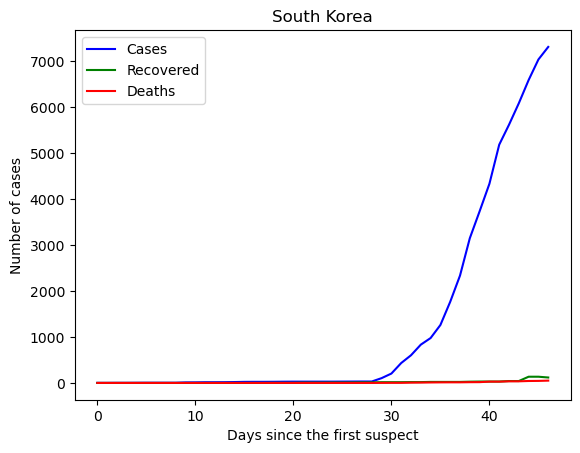

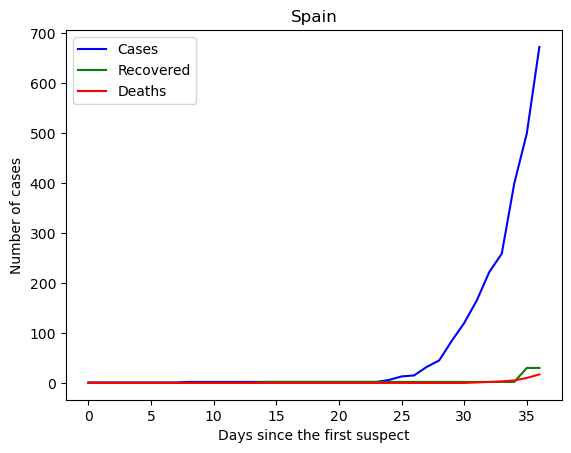

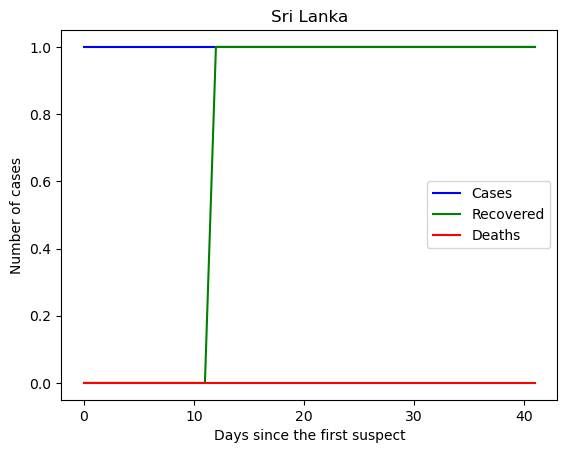

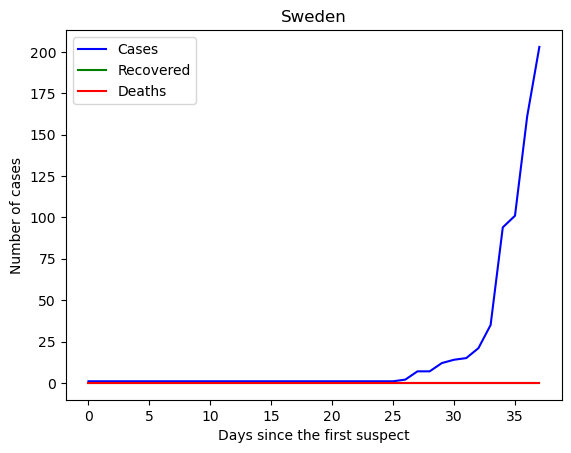

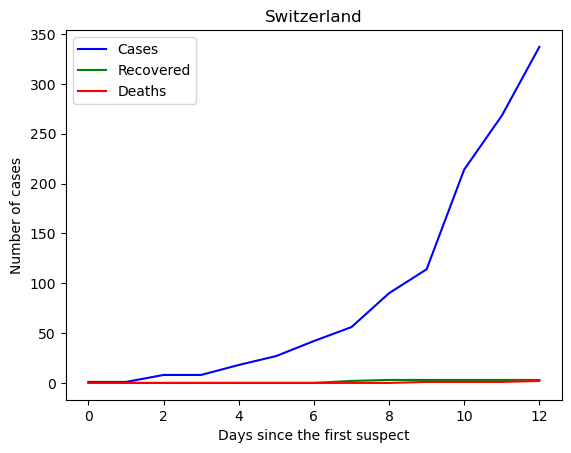

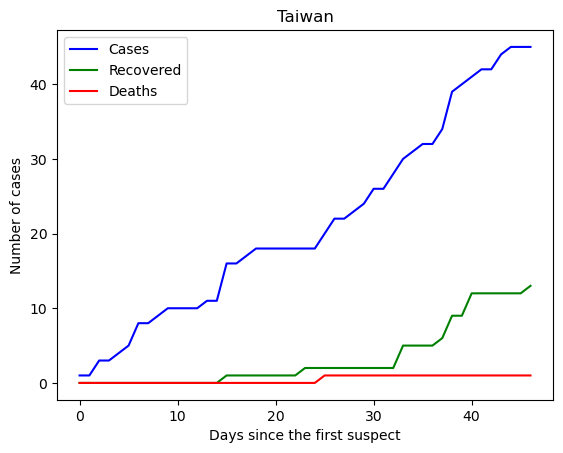

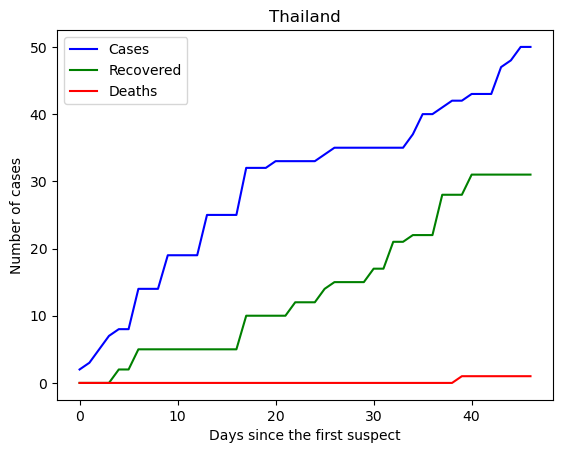

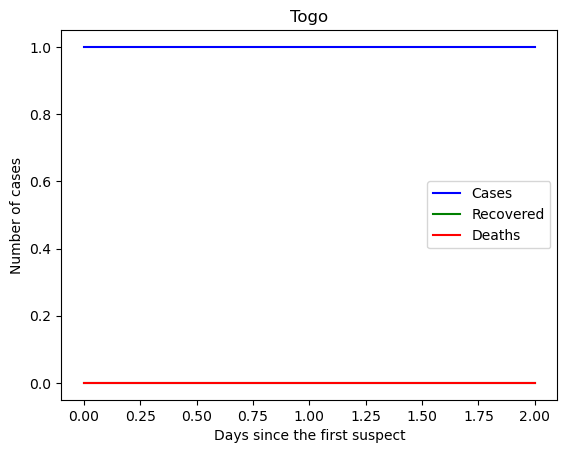

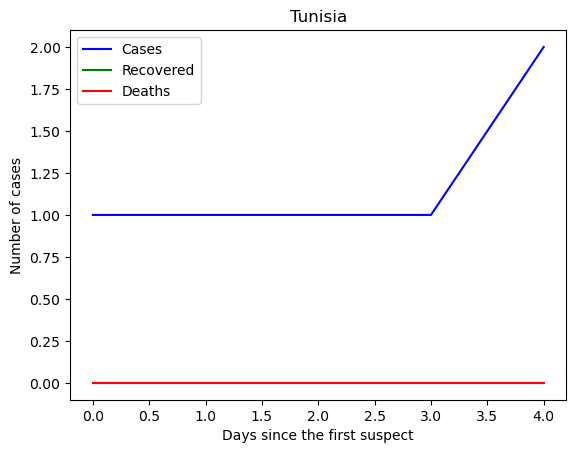

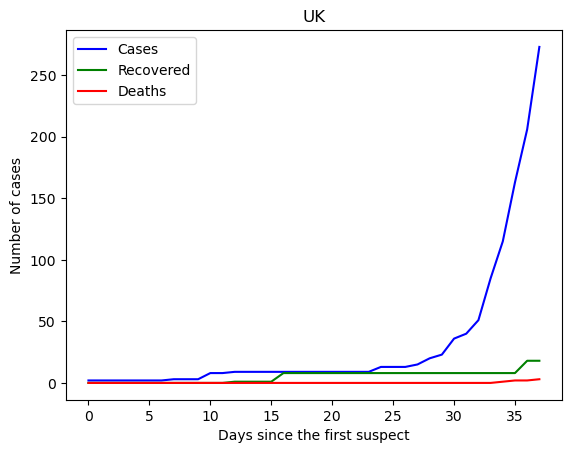

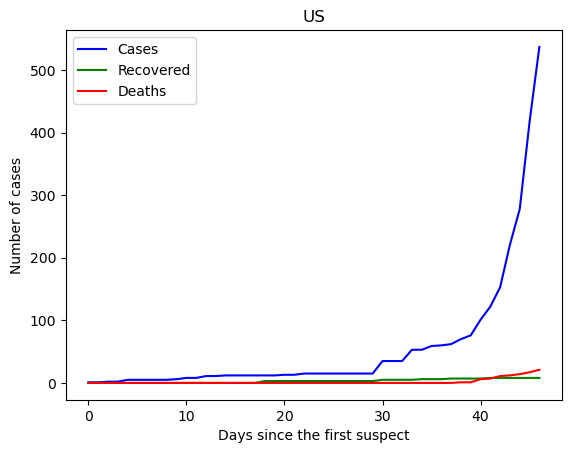

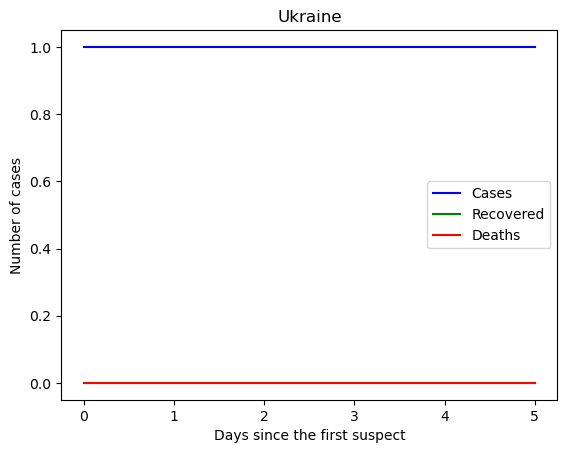

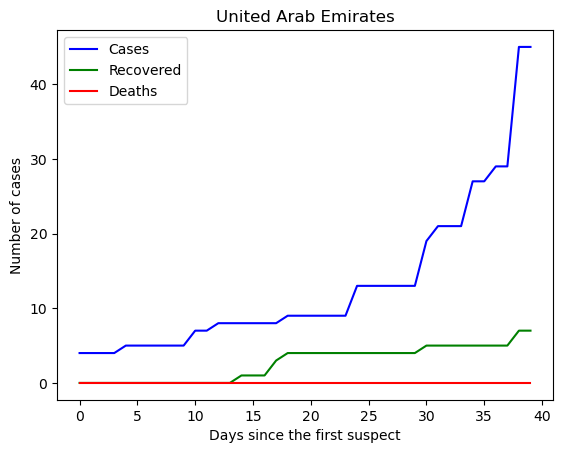

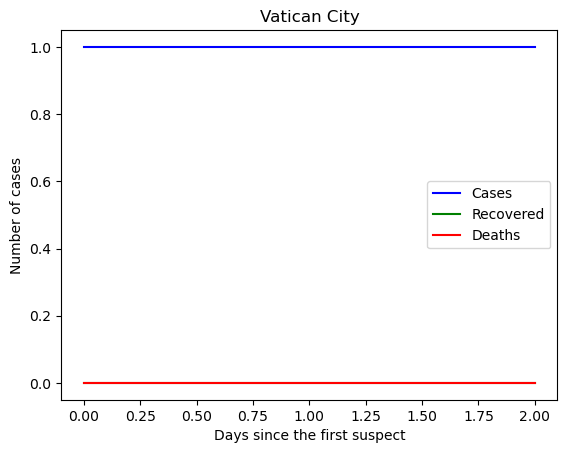

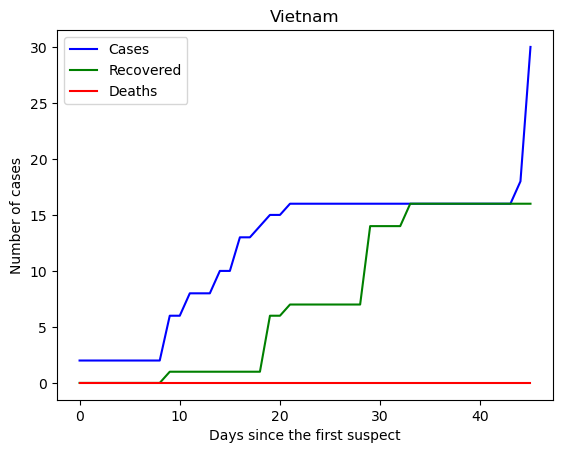

In [43]:
for idx in range(0,len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.plot(np.arange(0,len(C)),C['Confirmed'],color='b', label='Cases')
    plt.plot(np.arange(0,len(C)),C['Recovered'],color='g', label='Recovered')
    plt.plot(np.arange(0,len(C)),C['Deaths'],color='r', label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()